## Exercise 1
A publishing company has recently launched a new journal. In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read the last issue of the journal.


a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal ?

Since it is a yes or no interview (from 150 people the question was "have you read it or not") hence,  I would assume binomial  distribution with parameter $\theta$:

$P(x_1, x_2, ..., x_{150}| \theta ) \sim \theta^{29} (1-\theta)^{121}$

b) Assuming a uniform prior, what is the posterior distribution for y ?


Assuming an uniform prior
$P(p) \sim U(0,1)$, we would like to know the posterior distribution for y.

Using the Bayes theorem to combine the prior distribution and the likelikood we obtain:

$P(\theta| D) = p(D, \theta) P(\theta)  = Beta(30,122)$
    
And this is the Beta densitity distribution function with parameter Beta(29, 121).

c) Plot both posterior and likelihood ditributions functions


In [3]:
n <- 150
r <- 29
p <- seq(0,1,0.001)
p.prior <- dunif(p)

p.likelihood  <-  dbinom(x = r, size = n, prob = p)
p.post <- dbeta(p, r+1, n-r+1)

p.post <- p.post / sum(p.post) #we normalize it

p.post0 <- p.prior * p.likelihood
df <- data.frame(p, p.likelihood, p.post, p.prior, p.post0)

In [4]:
library(ggplot2)
library(ggthemes)

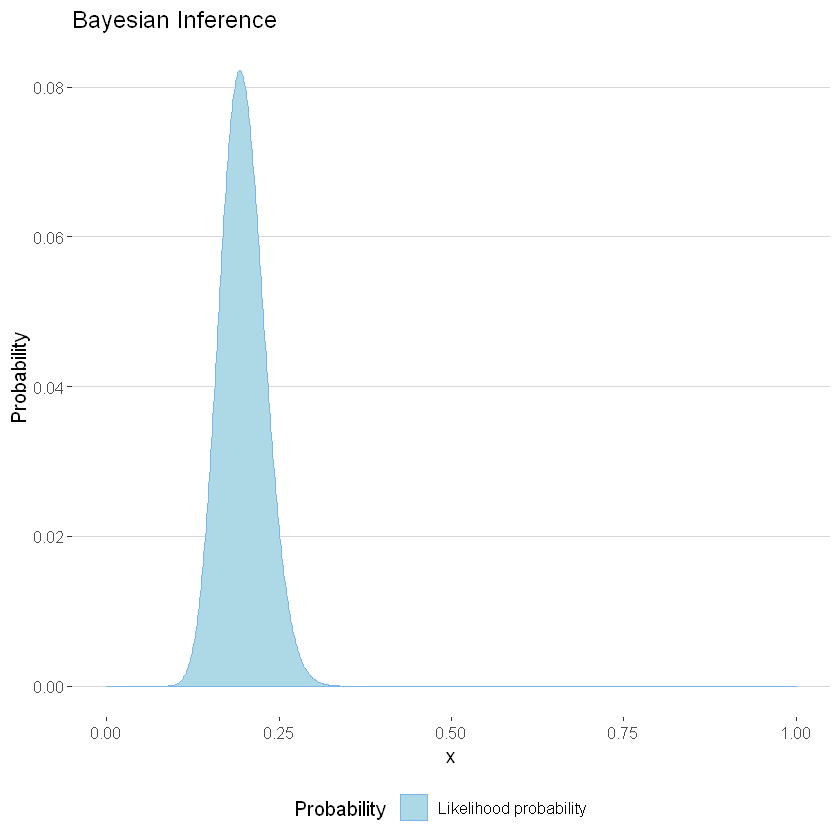

In [5]:
p <-ggplot(df, aes(x=p, y = p.likelihood, col = 'Likelihood probability')) 
p <- p +  geom_area(fill="lightblue")  
p <- p +  labs( y="Probability", x = "x", col = 'Probability')  + xlim(c(0,1))
p <- p +ggtitle("Bayesian Inference")+ theme_hc()+ scale_colour_hc()
p <- p 
p

Warning message:
"Removed 500 rows containing missing values (position_stack)."

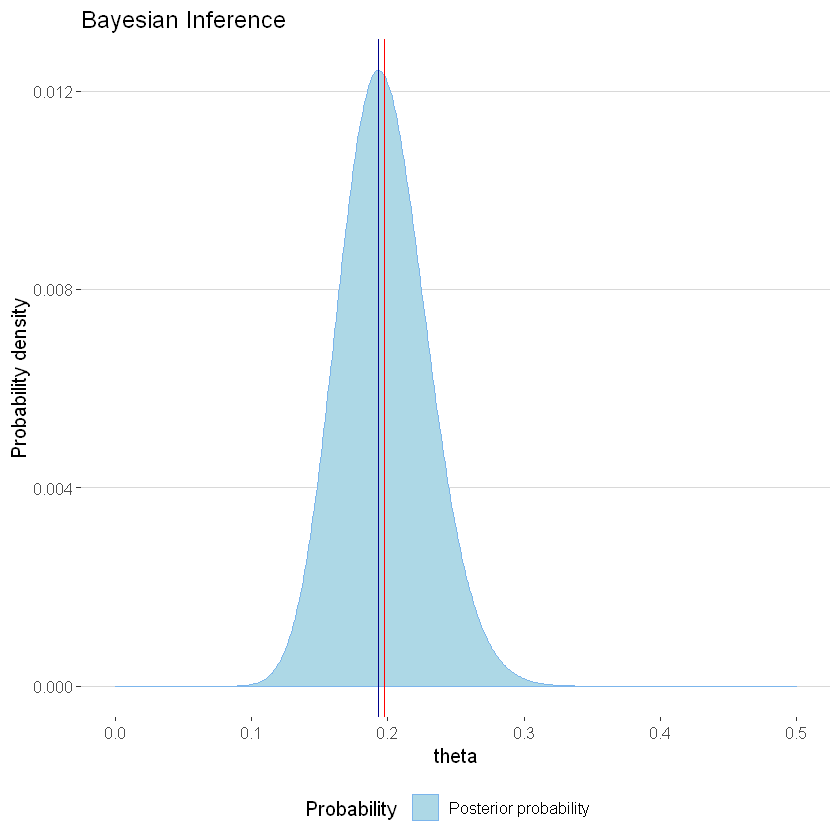

In [4]:
a=r+1
b=n-r+1

mean=a/(a+b)
mode=(a-1)/(a+b-2)


p <-ggplot(df, aes(x=p, y = p.post, col = 'Posterior probability')) 
p <- p +  geom_area(fill="lightblue")  + xlim(c(0,0.5))
p <- p +  labs( y="Probability density", x = "theta", col = 'Probability')
p <- p +  geom_vline(xintercept = mean, colour="red")+geom_vline(xintercept = mode, colour="darkblue")
p <- p +ggtitle("Bayesian Inference")+ theme_hc()+ scale_colour_hc()
p <- p 
p

In [5]:
p.post_cumsum=cumsum(p.post)
p.post_CI=ifelse(p.post_cumsum<0.025|p.post_cumsum>0.975, "outside CI", "inside CI")

df$CI <- p.post_CI

Warning message:
"Removed 500 rows containing missing values (position_stack)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

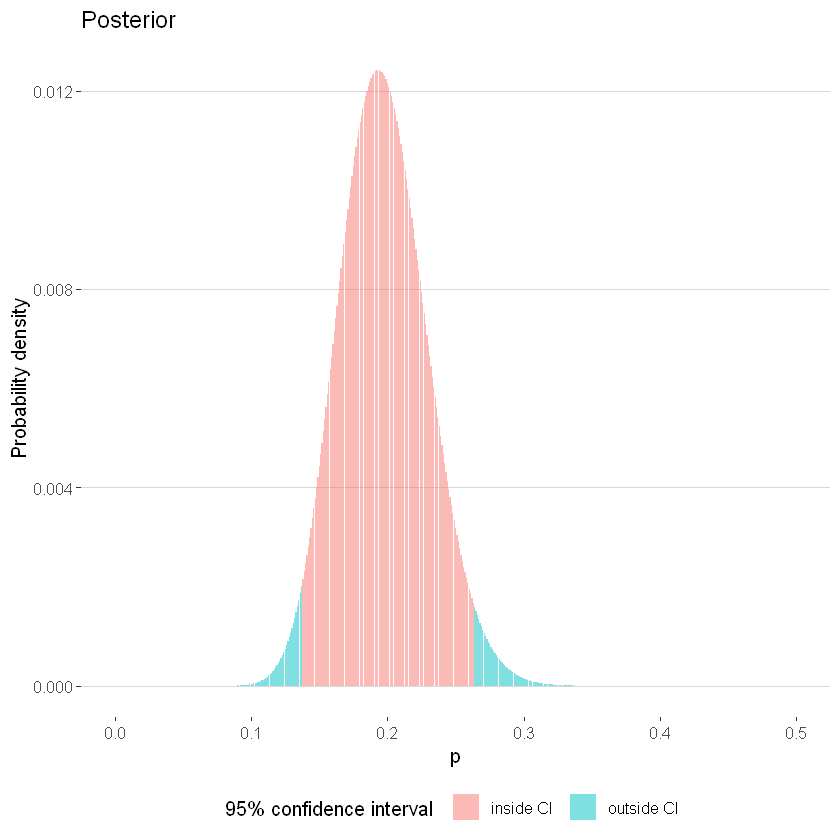

In [6]:
#lets go a little bit further
ggplot(df, aes(x=p, y=p.post, fill=CI))+
  geom_bar(stat="identity", alpha=0.5)+ xlim (c(0,0.5)) + theme_hc()+ scale_colour_hc() +
  ylab("Probability density")+
  ggtitle("Posterior")+
  labs(fill='95% confidence interval')

## Exercise 2
Three students want to construct their prior probability about the proportion of residents that support the building of a new concert hall in their small town.

Anna thinks that her prior is a beta distribution with mean 0.2 and a standard deviation of 0.08.

Benny moved only recently to this new town and therefore he does non have the slightest idea aboutit. Therefore he decides to use a uniform prior.

Chris believes that his prior should have a trapezoidal shape

should have a trapezoidal shape


 $ 
    f(X) = \left\{\begin{array}{lr}
        20x, & \text{for } 0\leq x\leq 0.1\\
        2, & \text{for } 0.1\leq x\leq 0.3\\
        5-10x, & 0.3\leq x\leq 0.4\\
        0, & x \geq 0.5
        \end{array}\right\} 
  $
  


a) Draw and compare the three prior distributions.

Given a beta distribution B(a, b) then, 

$\mu = \frac{a}{a+b}$ 

and, 

$\sigma^2 = \frac{ab}{(a+b)^2(a+b+1)}$

Then, for Anna with some simple calculation we get that, 

a = 4.8

b = 19.2


In [2]:
a <- 4.8
b <- 19.2

mean <- a /(a+b)
sigma <- sqrt((a*b)/((a+b)**2*(a+b+1)))
mean
sigma

[1] 0.2

[1] 0.08

In [8]:
p <- seq(0,1, 0.01)
anna <- dbeta(x = p, a, b)

In [9]:
#For Benny, a = b = 1
benny <- dunif(x = p)

In [10]:
#for chris
density <- function (x){
    result <- c()
    for (i in x){
        val <- if (i >= 0 & i < 0.1){
                            20 * i }
                
               else if (i >= 0.1 & i < 0.3){
                            2 }
               else if (i >= 0.3 & i < 0.5){
                            5 - 10 * i }
              else 0
        result <- c(result, val)}
    return(result)}

In [11]:
chris <- density(p)
df <- data.frame(p, anna, benny, chris)

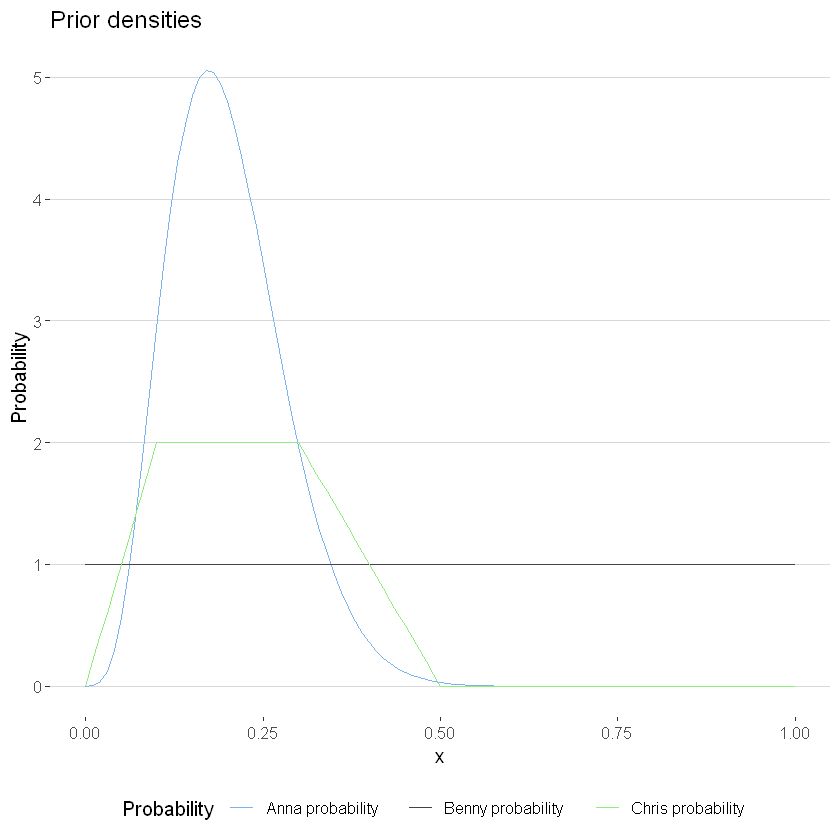

In [12]:
p <-ggplot(df, aes(x=p, y = anna, col = 'Anna probability')) 
p <- p +  geom_line()  
p <- p +   geom_line(aes(x=p, y = benny, col = 'Benny probability'))
p <- p +   geom_line(aes(x=p, y = chris, col = 'Chris probability'))
p <- p +  labs( y="Probability", x = "x", col = 'Probability')  
p <- p + ggtitle("Prior densities")+ theme_hc()+ scale_colour_hc()
p <- p 
p

Clearly, the area covered by chris is not 1 (it is not normalized)

The next day the three students decide to interview a sample of 100 citizens of the small town, asking for their opinion. Out of the interviewed sample, 26 support the building of the new concert
hall.
b) Evaluate and draw the three prior distributions.

In [13]:
#we need to find the posterior, for anna and benny it is simply, 
#Recall that the likelihood is nothing else as a binomial distribution
p <- seq(0,1,0.01)
anna_post <- dbeta(x = p, a+26,  b + 74)
benny_post <- dbeta(p, 27, 75)

In [14]:
#for chris we need to derive the posterior, 
f <- function (p){p ** 26 * ( 1-p) **(100-26)}
int <-  function(p) {density(p) * f(p)}
den <- integrate(int, 0, 1)$value

In [15]:
binom <- f(p)
num <- chris *f(p)
chris_post <- num / den

df <- data.frame(p, anna_post, benny_post, chris_post)

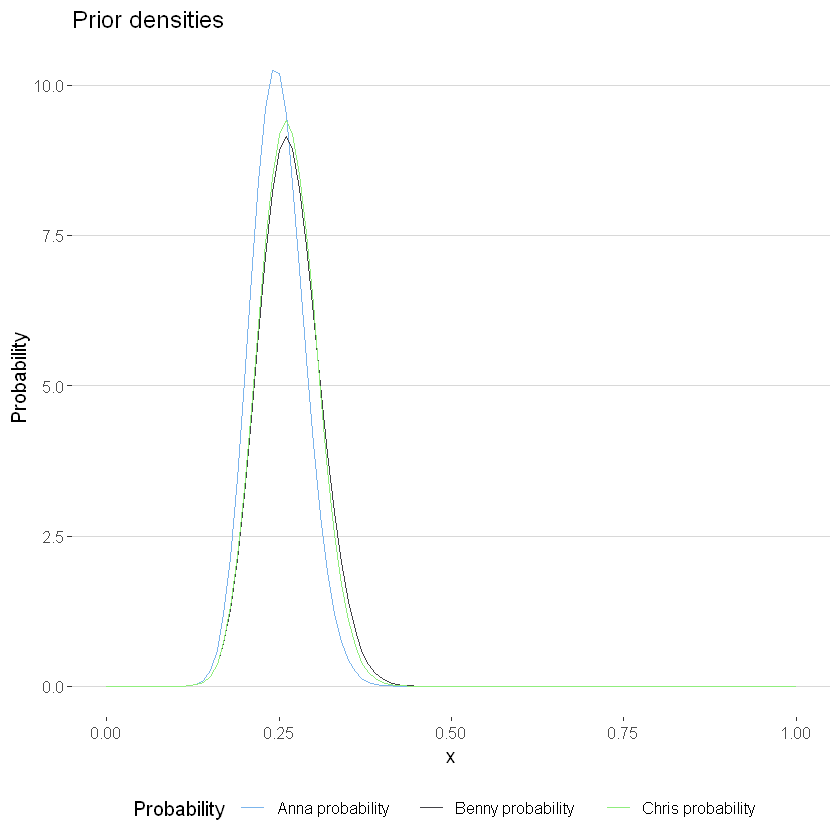

In [16]:
p <-ggplot(df, aes(x=p, y = anna_post, col = 'Anna probability')) 
p <- p +  geom_line()  
p <- p +   geom_line(aes(x=p, y = benny_post, col = 'Benny probability'))
p <- p +   geom_line(aes(x=p, y = chris_post, col = 'Chris probability'))
p <- p +  labs( y="Probability", x = "x", col = 'Probability')  
p <- p + ggtitle("Prior densities")+ theme_hc()+ scale_colour_hc()
p <- p 
p

When n is large, the prior does not influence so much. 

c) Give an estimate of the most probable value and the 95% credibility interval.

In [17]:
#Let's look for the posterior mean (expected value)
anna_ <- function(p){ p *dbeta(p, a+26,  b + 74)}
benny_ <- function(p){p* dbeta(p, 27, 75)}

anna_mean <- integrate(anna_, 0, 1)$value
print(c("The mean value of the posterior distribution of Anna is: ", anna_mean))

benny_mean <- integrate(benny_, 0, 1)$value
print(c("The mean value of the posterior distribution of Benny is: ", benny_mean))

chris_ <- function(p){p * density(p) *f(p) / 2.75073695621892e-26}
chris_mean <- integrate(chris_, 0, 1)$value
print(c("The mean value of the posterior distribution of Chris is: ", chris_mean))

[1] "The mean value of the posterior distribution of Anna is: "
[2] "0.2483870967742"                                          
[1] "The mean value of the posterior distribution of Benny is: "
[2] "0.264705882352941"                                         
[1] "The mean value of the posterior distribution of Chris is: "
[2] "0.262659755072606"                                         


In [3]:
library(Bolstad2)

In [36]:
#Lets look for the 95% credibility interval
p <- seq(0,1,0.01)
anna_post <- dbeta(x = p, a+26,  b + 74)
benny_post <- dbeta(p, 27, 75)
#chris_post <- num / den

cdf_anna <- sintegral(p, anna_post)
cdf_benny <- sintegral(p, benny_post)
cdf_chris<- sintegral(p, chris_post)

ERROR: Error in plot(cdf_chris, type = "l", xlab = expression(theta[0]), ylab = expression(Pr(theta <= : objeto 'cdf_chris' no encontrado


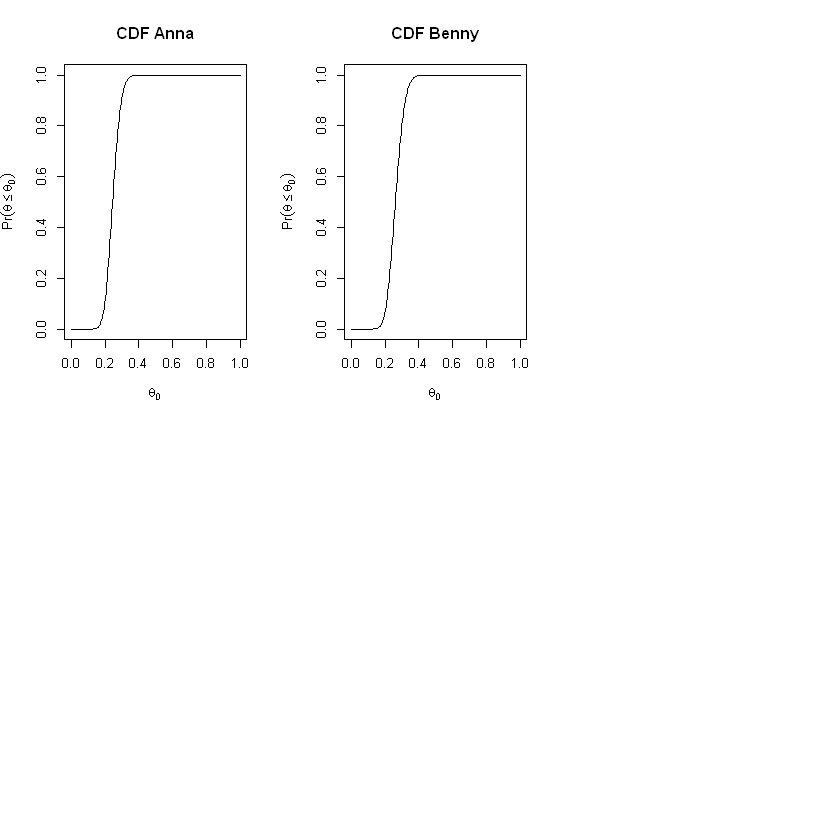

In [37]:
par(mfrow=c(2,3))
plot(cdf_anna,type="l",xlab=expression(theta[0]) ,ylab=expression(Pr(theta<=theta[0])), main = 'CDF Anna')
plot(cdf_benny,type="l",xlab=expression(theta[0]) ,ylab=expression(Pr(theta<=theta[0])), main = 'CDF Benny')
plot(cdf_chris,type="l",xlab=expression(theta[0]) ,ylab=expression(Pr(theta<=theta[0])), main = 'CDF Chris')

In [38]:
#Notice that the confidence interval is given by, (1-0.95)*2
#Anna
d<-abs(cdf_anna$y-0.025)
lb_anna<-cdf_anna$x[max((1:length(cdf_anna$y))[d==min(d)])]

d<-abs(cdf_anna$y-0.975)
ub_anna<-cdf_anna$x[min((1:length(cdf_anna$y))[d==min(d)])]

#Benny
d<-abs(cdf_benny$y-0.025)
lb_benny<-cdf_benny$x[max((1:length(cdf_benny$y))[d==min(d)])]

d<-abs(cdf_benny$y-0.975)
ub_benny<-cdf_benny$x[min((1:length(cdf_benny$y))[d==min(d)])]

#Chris
d<-abs(cdf_chris$y-0.025)
lb_chris<-cdf_chris$x[max((1:length(cdf_chris$y))[d==min(d)])]

d<-abs(cdf_chris$y-0.975)
ub_chris<-cdf_chris$x[min((1:length(cdf_chris$y))[d==min(d)])]

In [40]:
cat(paste("Approximate 95% credible interval for Anna : ["
          ,round(lb_anna,4)," ",round(ub_anna,4),"]\n",sep=""))

cat(paste("Approximate 95% credible interval for Benny : ["
          ,round(lb_benny,4)," ",round(ub_benny,4),"]\n",sep=""))

#cat(paste("Approximate 95% credible interval for Chris : ["
#          ,round(lb_chris,4)," ",round(ub_chris,4),"]\n",sep=""))

Approximate 95% credible interval for Anna : [0.1738 0.3262]
Approximate 95% credible interval for Benny : [0.1816 0.3535]


## Exercise 3
A coin is flipped n = 30 times with the following outcomes:

    T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H
    
a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

In [23]:
n <- 30
#the number of heads it is 15
r <- 15

p <- seq(0,1, 0.01)
p.likelihood <- dbinom(x = r, size = n, prob = p)
df <- data.frame(p,p.likelihood)

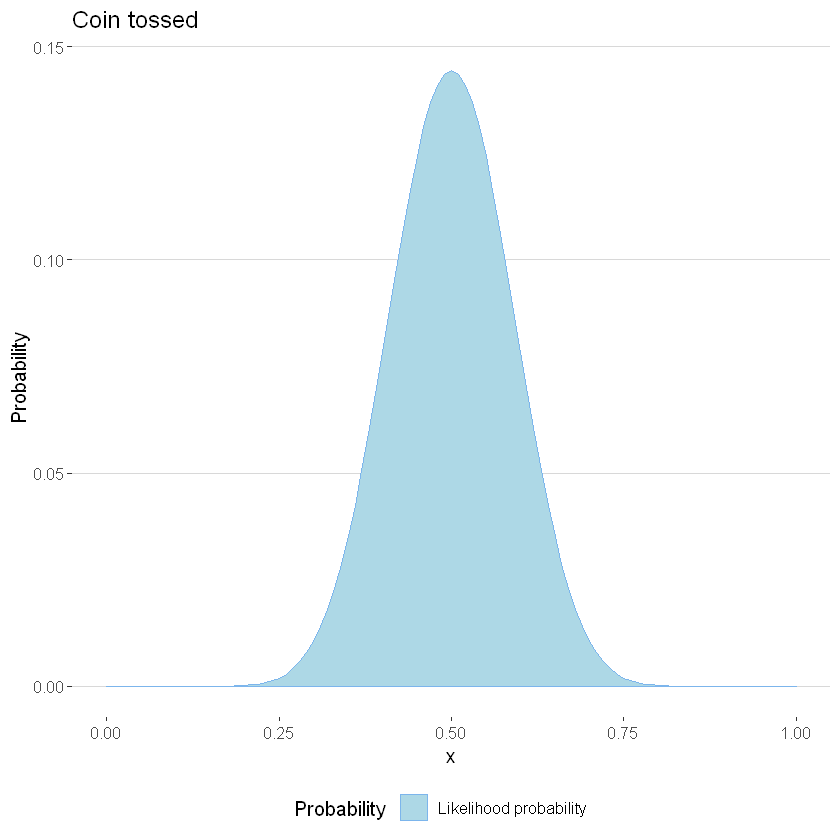

In [24]:
p <-ggplot(df, aes(x=p, y = p.likelihood, col = 'Likelihood probability')) 
p <- p +  geom_area(fill="lightblue")  
p <- p +  labs( y="Probability", x = "x", col = 'Probability')  
p <- p +ggtitle("Coin tossed")+ theme_hc()+ scale_colour_hc()
p <- p 
p

In [25]:
#Flat prior is going to be an uniform distribution in 0 and 1
p <- seq(0,1, 0.01)
flat_prior <- dunif(p, 0, 1)

#Then the posterior distribution is nothing else as Beta(k+1, n-k+1)
flat_posterior <- dbeta(p, r+1, n-r+1)

Given a beta distribution B(a, b) then, 

$\mu = \frac{a}{a+b} = 0.5$ 

and, 

$\sigma^2 = \frac{ab}{(a+b)^2(a+b+1)} = 1/84$


In [26]:
#beta prior Beta(a, b)
a <- 10
b <- 10
beta_prior <- dbeta(p, a, b)

#the posterior is
beta_posterior <- dbeta(p, r+a, n-r+b)

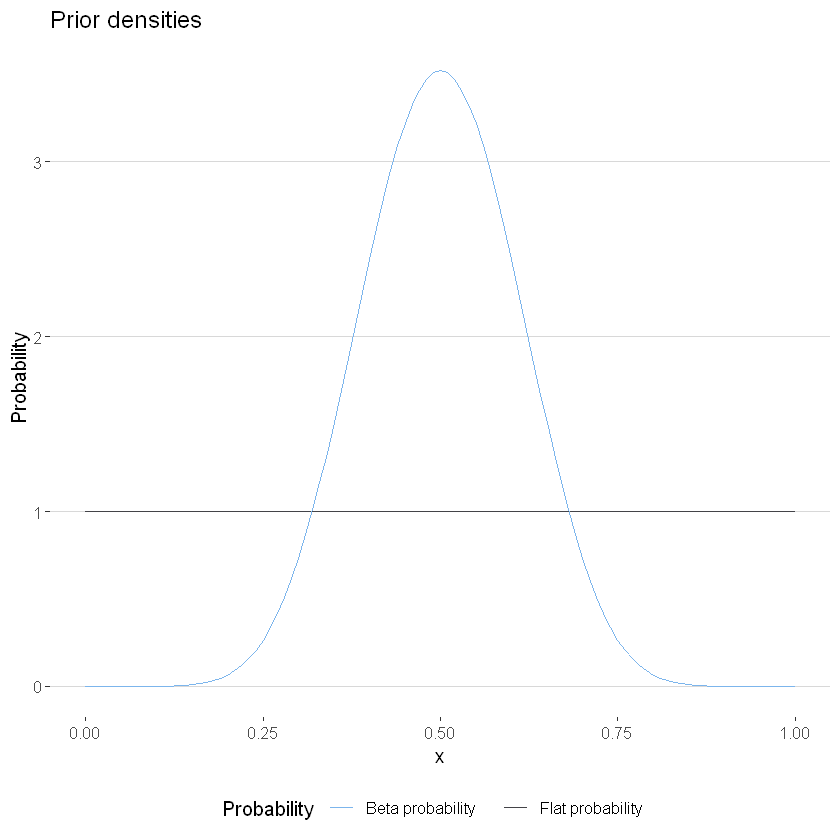

In [27]:
df <- data.frame(p, flat_prior, flat_posterior, beta_prior, beta_posterior)
p <-ggplot(df, aes(x=p, y = flat_prior, col = 'Flat probability')) 
p <- p +  geom_line()  
p <- p +   geom_line(aes(x=p, y = beta_prior, col = 'Beta probability'))
p <- p +  labs( y="Probability", x = "x", col = 'Probability')  
p <- p + ggtitle("Prior densities")+ theme_hc()+ scale_colour_hc()
p <- p 
p

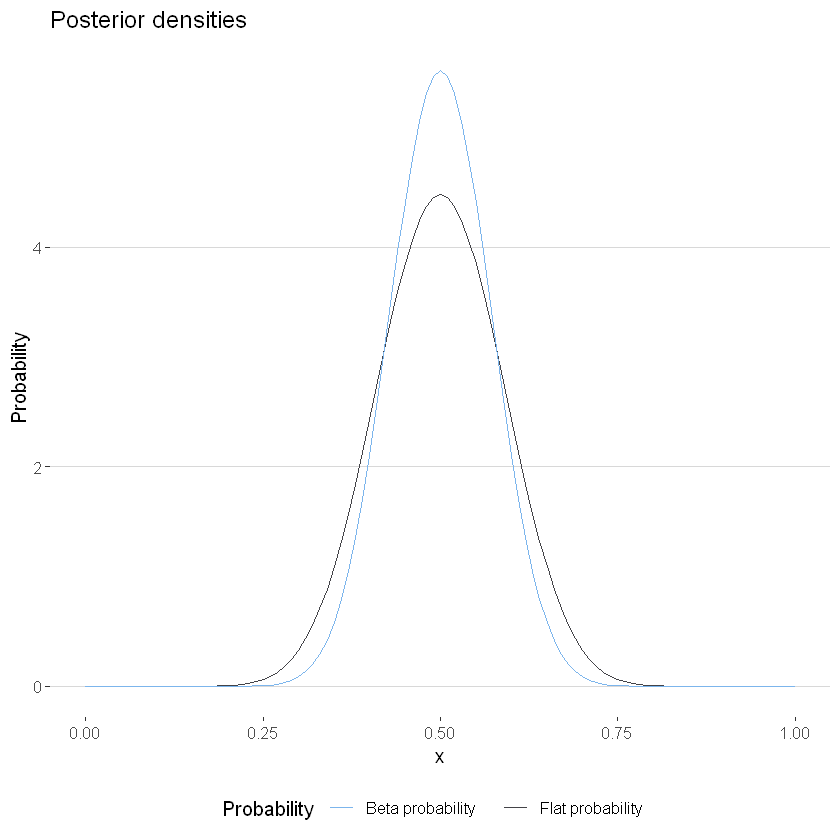

In [28]:
p <-ggplot(df, aes(x=p, y = flat_posterior, col = 'Flat probability')) 
p <- p +  geom_line()  
p <- p +   geom_line(aes(x=p, y = beta_posterior, col = 'Beta probability'))
p <- p +  labs( y="Probability", x = "x", col = 'Probability')  
p <- p + ggtitle("Posterior densities")+ theme_hc()+ scale_colour_hc()
p <- p 
p

In [29]:
#Or I CAN ASLO HAVE DONE IT AS FOLLOW
p <- seq(0,1, 0.01)
n <- 30
r <- 15
p <- seq(0,1, 0.01)
p.likelihood <- dbinom(x = r, size = n, prob = p)
p.likelihood <- p.likelihood /(0.01 *sum(p.likelihood ))

flat_prior <- dunif(p, 0, 1)
flat_posterior <- p.likelihood * flat_prior# / integrate(flat_, 0, 1)$value
flat_posterior <- flat_posterior / (0.01*sum(flat_posterior))

beta_prior <- dbeta(p, a, b)
beta_posterior <- p.likelihood * beta_prior# / integrate(beta_, 0, 1)$value
beta_posterior <- beta_posterior / (0.01*sum(beta_posterior))

beta_mean <- sum(p * beta_posterior * 0.01)#integrate(beta_, 0, 1)$value
beta_mean

flat_mean <- sum(p * flat_posterior*0.01)#integrate(flat_, 0, 1)$value
flat_mean 


[1] 0.5

[1] 0.5

b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability
distribution, give an estimate for a 95% credibility interval.

In [30]:
#Let's look for the posterior mean (expected value)
beta_ <- function(p){ p *dbeta(p, r+a, n-r+b)}
flat_ <- function(p){p* dbeta(p, r+1, n-r+1)}

beta_mean <- integrate(beta_, 0, 1)$value
print(c("The mean value of the posterior distribution of beta Prior is: ", beta_mean))

flat_mean <- integrate(flat_, 0, 1)$value
print(c("The mean value of the posterior distribution of flat Prior  is: ", flat_mean))

#which is of course that our mean that we expected (it was a fair coin)

[1] "The mean value of the posterior distribution of beta Prior is: "
[2] "0.500000000000001"                                              
[1] "The mean value of the posterior distribution of flat Prior  is: "
[2] "0.5"                                                             


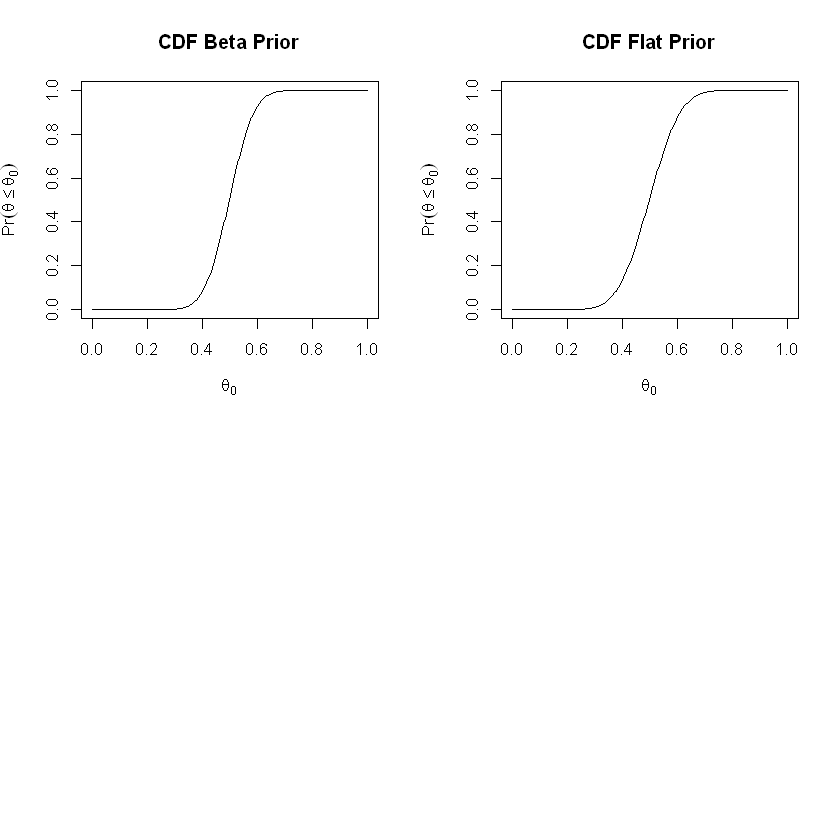

In [31]:
#to calculate the 95% interval
p <- seq(0,1,0.01)
beta_post <- dbeta(p, r+a, n-r+b)
flat_post <- dbeta(p, r+1, n-r+1)

cdf_beta <- sintegral(p, beta_post)
cdf_flat <- sintegral(p, flat_post)
par(mfrow=c(2,2))
plot(cdf_beta,type="l",xlab=expression(theta[0]) ,ylab=expression(Pr(theta<=theta[0])), main = 'CDF Beta Prior')
plot(cdf_flat,type="l",xlab=expression(theta[0]) ,ylab=expression(Pr(theta<=theta[0])), main = 'CDF Flat Prior')

In [32]:
#Beta
d<-abs(cdf_beta$y-0.025)
lb_beta<-cdf_beta$x[max((1:length(cdf_beta$y))[d==min(d)])]

d<-abs(cdf_beta$y-0.975)
ub_beta<-cdf_beta$x[min((1:length(cdf_beta$y))[d==min(d)])]

#Flat
d<-abs(cdf_flat$y-0.025)
lb_flat<-cdf_flat$x[max((1:length(cdf_flat$y))[d==min(d)])]

d<-abs(cdf_flat$y-0.975)
ub_flat<-cdf_flat$x[min((1:length(cdf_flat$y))[d==min(d)])]

In [33]:
cat(paste("Approximate 95% credible interval for beta prior : ["
          ,round(lb_beta,4)," ",round(ub_beta,4),"]\n",sep=""))

cat(paste("Approximate 95% credible interval for Flat Prior : ["
          ,round(lb_flat,4)," ",round(ub_flat,4),"]\n",sep=""))

Approximate 95% credible interval for beta prior : [0.3613 0.6348]
Approximate 95% credible interval for Flat Prior : [0.3301 0.666]


c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable
value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to
30).

Now we'll assume that the coin was tossed 30 times and each of them we get a different outcome.


Of course, the more time it goes, the more resemble it is the likelihood with the beta and flat posterior.





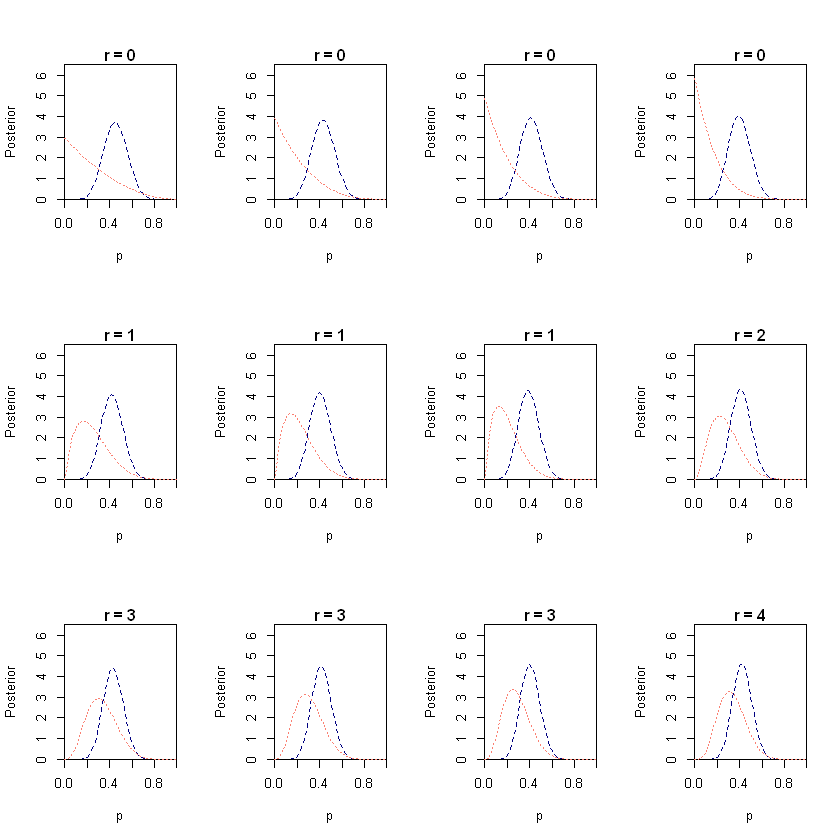

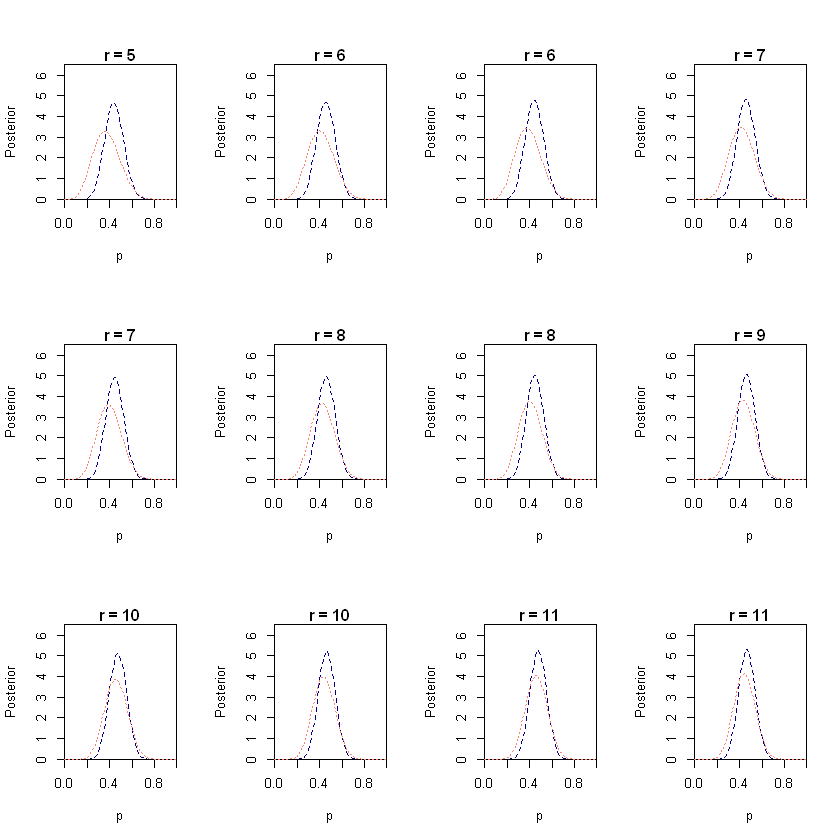

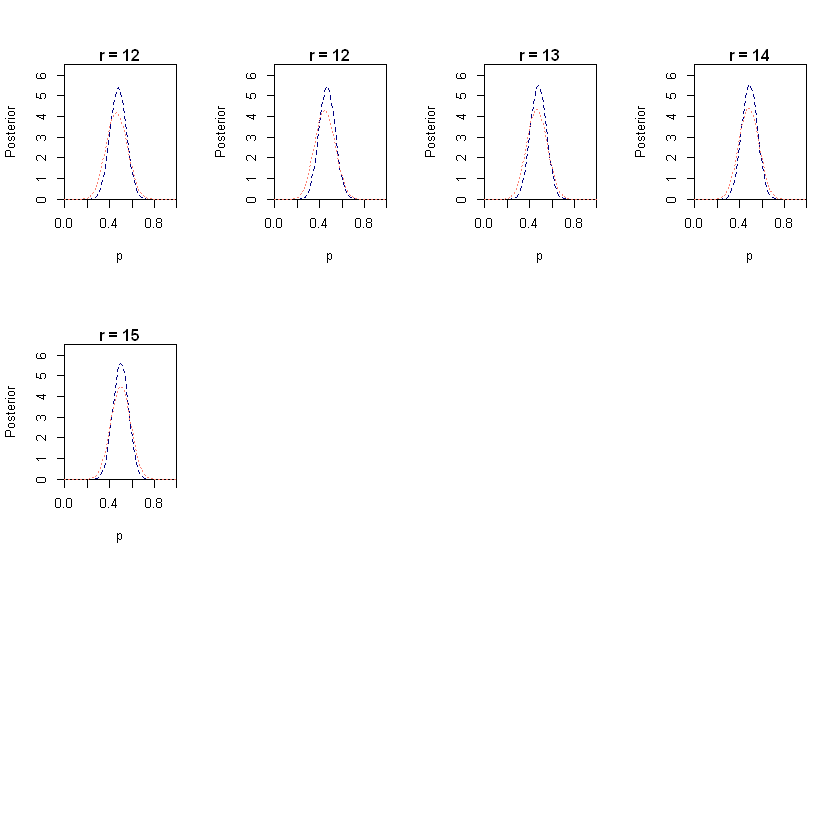

In [34]:
beta.mean <- c()
flat.mean <- c()

beta.lb<- c()
beta.ub <- c()

flat.lb<- c()
flat.ub <- c()

#The first value is given by;
p <- seq(0,1, 0.01)
n <- 1
r <- 0

p.likelihood <- dbinom(x = r, size = n, prob = p)
p.likelihood <- p.likelihood /(0.01 *sum(p.likelihood ))

flat_prior <- dunif(p, 0, 1)
flat_posterior <- p.likelihood * flat_prior# / integrate(flat_, 0, 1)$value
flat_posterior <- flat_posterior / (0.01*sum(flat_posterior))

beta_prior <- dbeta(p, a, b)
beta_posterior <- p.likelihood * beta_prior# / integrate(beta_, 0, 1)$value
beta_posterior <- beta_posterior / (0.01*sum(beta_posterior))

beta_mean <- sum(p * beta_posterior * 0.01)#integrate(beta_, 0, 1)$value
beta.mean <- append(beta.mean, beta_mean)

flat_mean <- sum(p * flat_posterior*0.01)#integrate(flat_, 0, 1)$value
flat.mean <- append(flat.mean, flat_mean)

#Calculating the 95% interval
cdf_beta <- sintegral(p, beta_posterior)
cdf_flat <- sintegral(p, flat_posterior)

#Beta
d<-abs(cdf_beta$y-0.025)
lb_beta<-cdf_beta$x[max((1:length(cdf_beta$y))[d==min(d)])]
beta.lb <- append(beta.lb, round(lb_beta,4))

d<-abs(cdf_beta$y-0.975)
ub_beta<-cdf_beta$x[min((1:length(cdf_beta$y))[d==min(d)])]
beta.ub <- append(beta.ub, round(ub_beta,4))

#Flat
d<-abs(cdf_flat$y-0.025)
lb_flat<-cdf_flat$x[max((1:length(cdf_flat$y))[d==min(d)])]
flat.lb <- append(flat.lb, round(lb_flat,4))

d<-abs(cdf_flat$y-0.975)
ub_flat<-cdf_flat$x[min((1:length(cdf_flat$y))[d==min(d)])]
flat.ub <- append(flat.ub, round(ub_flat,4))

#The result of the coins are given as:
results <- c(0,  0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1 )

#size
j <- 2
#number of succes 
r <- 0

flat_prior <- flat_posterior
beta_prior <- beta_posterior
par(mfrow=c(3,4))#, mgp=c(2,0.8,0), mar=c(3.5,3.5,1.5,1), oma=0.5*c(1,1,1,1))

for( i in results[2:30]){    
    n <- j 
    r <-i +r

    #posterior becomes prior
    p.likelihood <- dbinom(x = i, size = 1, prob = p)
    p.likelihood <- p.likelihood /(0.01 *sum(p.likelihood ))

    #flat_prior <- flat_posterior 
    flat_posterior <- p.likelihood * flat_prior# / integrate(flat_, 0, 1)$value
    flat_posterior <- flat_posterior / (0.01*sum(flat_posterior))
    
   # beta_prior <- beta_posterior
    beta_posterior <- p.likelihood * beta_prior# / integrate(beta_, 0, 1)$value
    beta_posterior <- beta_posterior / (0.01*sum(beta_posterior))
    
    
    plot(p,beta_posterior, type="l", lwd=1.5, col = 'navy', lty=2, xlim=c(0,1), ylim=c(0, 6.5),
    xaxs="i", yaxs="i", xlab="p", ylab="Posterior", pch="*")
    lines(p, flat_posterior, lwd=1.5, lty=3, col='salmon')
    title(main=paste("r =",r), line=0.3, cex.main=1.2)
    
    flat_prior <- flat_posterior
    beta_prior <- beta_posterior
#---------------------------------------------------------------------------------------
    beta_mean <- sum(p * beta_posterior * 0.01)#integrate(beta_, 0, 1)$value
    beta.mean <- append(beta.mean, beta_mean)

    flat_mean <- sum(p * flat_posterior*0.01)#integrate(flat_, 0, 1)$value
    flat.mean <- append(flat.mean, flat_mean)

    #Calculating the 95% interval
    cdf_beta <- sintegral(p, beta_posterior)
    cdf_flat <- sintegral(p, flat_posterior)

    #Beta
    d<-abs(cdf_beta$y-0.025)
    lb_beta<-cdf_beta$x[max((1:length(cdf_beta$y))[d==min(d)])]
    beta.lb <- append(beta.lb, round(lb_beta,4))
    
    d<-abs(cdf_beta$y-0.975)
    ub_beta<-cdf_beta$x[min((1:length(cdf_beta$y))[d==min(d)])]
    beta.ub <- append(beta.ub, round(ub_beta,4))
    
    #Flat
    d<-abs(cdf_flat$y-0.025)
    lb_flat<-cdf_flat$x[max((1:length(cdf_flat$y))[d==min(d)])]
    flat.lb <- append(flat.lb, round(lb_flat,4))
    
    d<-abs(cdf_flat$y-0.975)
    ub_flat<-cdf_flat$x[min((1:length(cdf_flat$y))[d==min(d)])]
    flat.ub <- append(flat.ub, round(ub_flat,4))
     
    j <- j + 1
    
}


In [35]:
df <- data.frame(1:30, beta.lb,beta.ub,  flat.lb, flat.ub)
col_names <- c("Step", "Lower Band - Beta Prior", "Upper Band - Beta Prior", "Lower Band - Flat Prior","Upper Band - Flat Prior")
names(df) <- col_names
df

Step,Lower Band - Beta Prior,Upper Band - Beta Prior,Lower Band - Flat Prior,Upper Band - Flat Prior
1,0.2715,0.6816,0.0098,0.8730
2,0.2559,0.6582,0.0059,0.7793
3,0.2402,0.6348,0.0059,0.7246
4,0.2285,0.6113,0.0020,0.7676
5,0.2207,0.5918,0.0020,0.9980
6,0.2402,0.6113,0.0332,0.5762
7,0.2324,0.5918,0.0293,0.5254
8,0.2207,0.5762,0.0254,0.4824
9,0.2441,0.5918,0.0645,0.5527
10,0.2637,0.6074,0.1074,0.6074


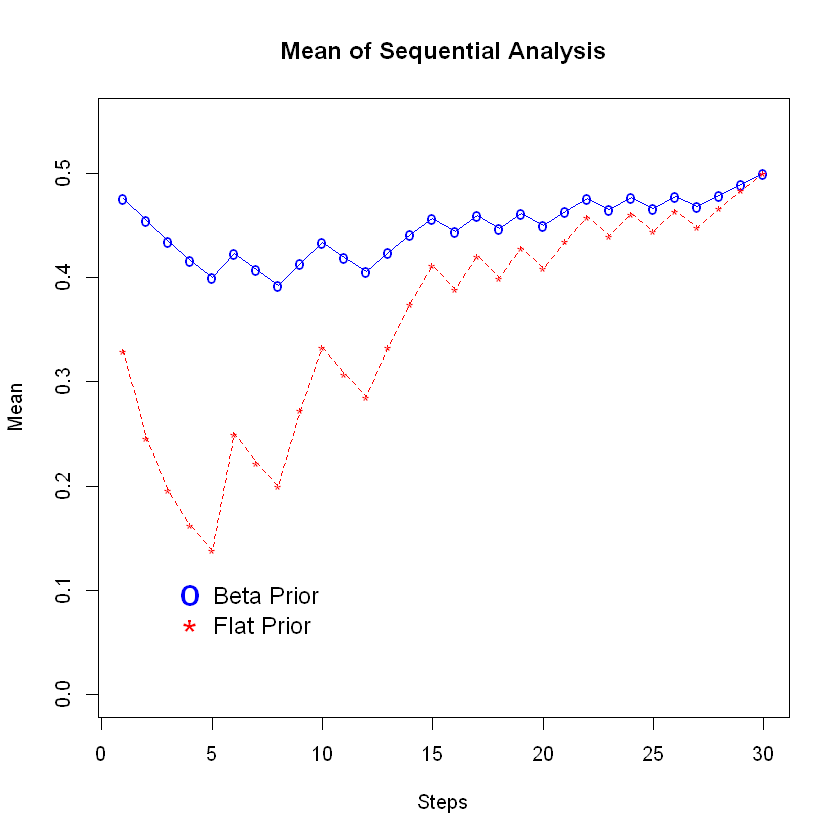

In [36]:
x <- 1:30
plot(x, beta.mean, type="o", col="blue", pch="o", ylim = c(0,0.55), lty=1, ylab="Mean", xlab = "Steps")
points(x, flat.mean, col="red", pch="*")
lines(x, flat.mean, col="red",lty=2)
title('Mean of Sequential Analysis')

legend("bottomleft", 
  legend = c("Beta Prior", "Flat Prior"), 
  col = c("blue","red"), 
  pch = c("o","*"), 
  bty = "n", 
  pt.cex = 2, 
  cex = 1.2, 
  text.col = "black", 
  horiz = F , 
  inset = c(0.1, 0.1))

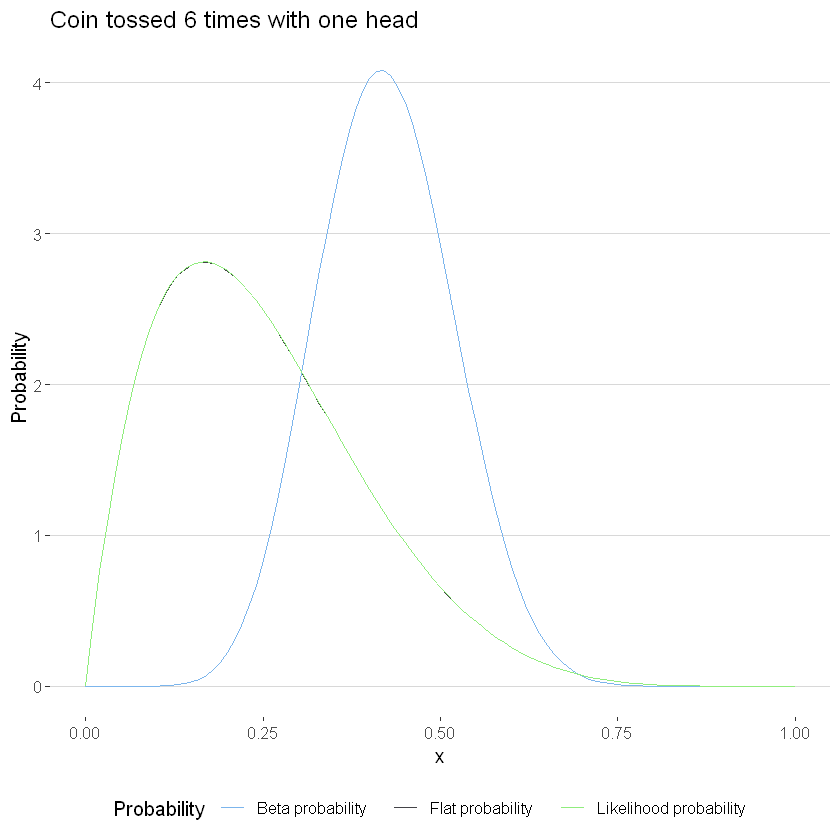

In [37]:
n <- 6
r <- 1
p <- seq(0,1, 0.01)
p.likelihood <- dbinom(x = r, size = n, prob = p)
p.likelihood <- p.likelihood /( 0.01* sum(p.likelihood ))
flat_posterior <- dbeta(p, r+1, n-r+1)
beta_posterior <- dbeta(p, r+a, n-r+b)

df <- data.frame(p,  p.likelihood, flat_posterior, beta_posterior)

p <-ggplot(df, aes(x=p, y = flat_posterior, col = 'Flat probability')) 
p <- p +  geom_line()  
p <- p +   geom_line(aes(x=p, y = beta_posterior, col = 'Beta probability'))
p <- p +   geom_line(aes(x=p, y = p.likelihood, col = 'Likelihood probability'))
p <- p +  labs( y="Probability", x = "x", col = 'Probability')  
p <- p + ggtitle("Coin tossed 6 times with one head")+ theme_hc()+ scale_colour_hc()
p <- p 
p

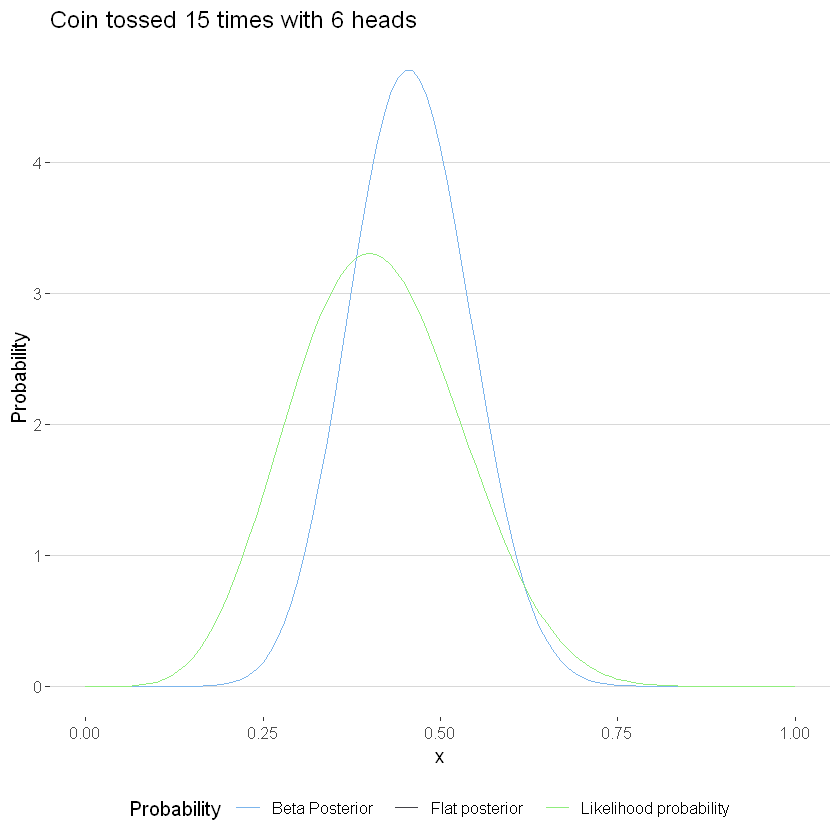

In [38]:
n <- 15
#the number of heads it is 15
r <- 6
p <- seq(0,1, 0.01)
p.likelihood <- dbinom(x = r, size = n, prob = p)
p.likelihood <- p.likelihood /( 0.01* sum(p.likelihood ))
flat_posterior <- dbeta(p, r+1, n-r+1)
beta_posterior <- dbeta(p, r+a, n-r+b)

df <- data.frame(p,  p.likelihood, flat_posterior, beta_posterior)

p <-ggplot(df, aes(x=p, y = flat_posterior, col = 'Flat posterior')) 
p <- p +  geom_line()  
p <- p +   geom_line(aes(x=p, y = beta_posterior, col = 'Beta Posterior'))
p <- p +   geom_line(aes(x=p, y = p.likelihood, col = 'Likelihood probability'))
p <- p +  labs( y="Probability", x = "x", col = 'Probability')  
p <- p + ggtitle("Coin tossed 15 times with 6 heads")+ theme_hc()+ scale_colour_hc()
p <- p 
p

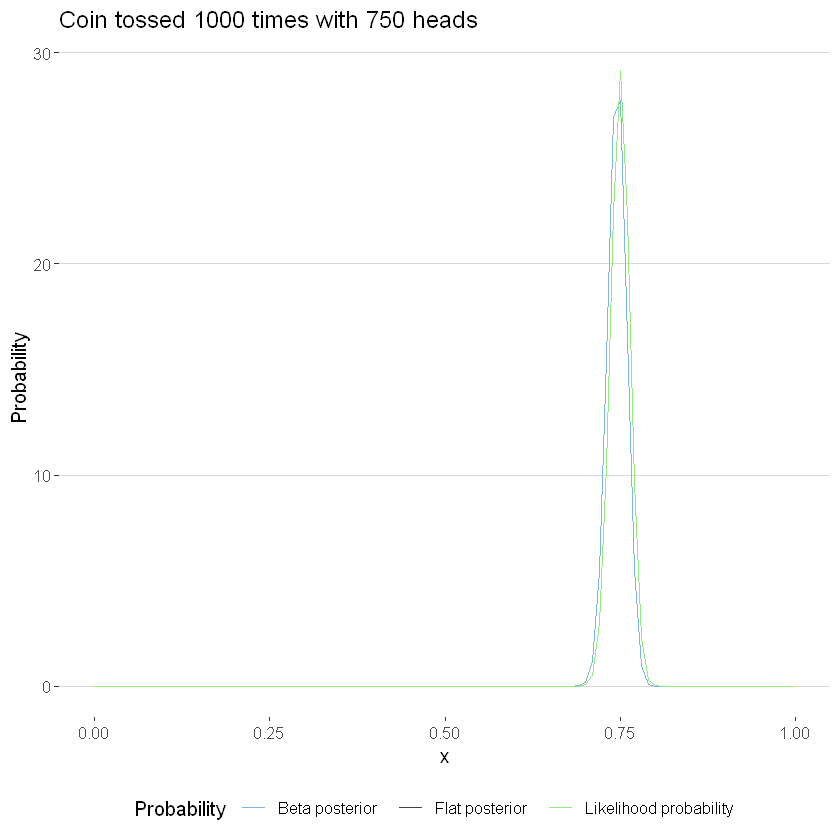

In [39]:
n <- 1000
r <- 750
p <- seq(0,1, 0.01)
p.likelihood <- dbinom(x = r, size = n, prob = p)
p.likelihood <- p.likelihood /(0.01 *sum(p.likelihood ))

flat_prior <- dunif(p, 0, 1)
flat_ <- function(p){dunif(p, 0, 1) * dbinom(x = r, size = n, prob = p)}
flat_posterior <- p.likelihood * flat_prior# / integrate(flat_, 0, 1)$value
flat_posterior <- flat_posterior / (0.01*sum(flat_posterior))

beta_prior <- dbeta(p, a, b)
beta_ <- function(p){dbeta(p, a, b) * dbinom(x = r, size = n, prob = p)}
beta_posterior <- p.likelihood * beta_prior# / integrate(beta_, 0, 1)$value
beta_posterior <- beta_posterior / (0.01*sum(beta_posterior))

df <- data.frame(p,  p.likelihood, flat_posterior, beta_posterior)
p <-ggplot(df, aes(x=p, y = flat_posterior, col = 'Flat posterior')) 
p <- p +  geom_line()  
p <- p +   geom_line(aes(x=p, y = beta_posterior, col = 'Beta posterior'))
p <- p +   geom_line(aes(x=p, y = p.likelihood, col = 'Likelihood probability'))
p <- p +  labs( y="Probability", x = "x", col = 'Probability')  
p <- p + ggtitle("Coin tossed 1000 times with 750 heads")+ theme_hc()+ scale_colour_hc()
p <- p 
p

d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?

The results are the same for both cases. It can be seen that when the number of flips increases, the prior become independent of the posterior as the above graph.